In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hierarchical Bayesian Models

A few really simple HBM models

## Model 1

Let's start with a really simple model.  We have $x$ and $y$ and nature knows that $y = 2 x + 2$.

If we are to simulate some data we will say that we have observed some $x_{\rm obs}$ and some $y_{\rm obs}$.  Our observed data has noise on it (additive Gaussian noise) so that,

$x_{\rm obs} = x + \mathcal{N}(0, 1)$,

$y_{\rm obs} = y + \mathcal{N}(0, 1)$.

Let's just start by simulating that data:

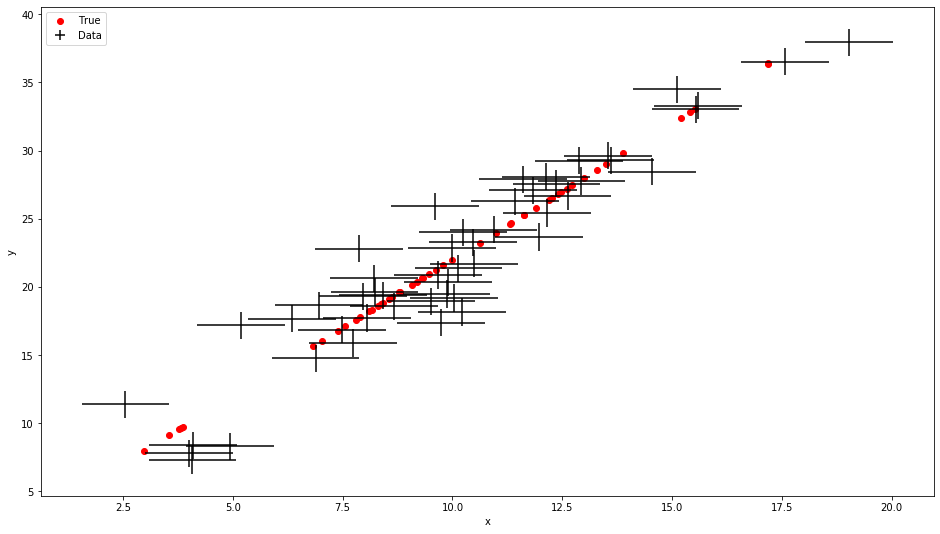

In [2]:
np.random.seed(53) # What is 53 in hexidecimal?
npts = 50
m = 2
c = 2
x_err = np.ones(npts)
y_err = np.ones(npts)

x = np.random.randn(npts) * 3 + 10
y = m*x + c

x_obs = x + np.random.randn(npts) * x_err
y_obs = y + np.random.randn(npts) * y_err

fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(x, y, c='r', label='True')
ax.errorbar(x_obs, y_obs, xerr=x_err, yerr=y_err, linestyle='none', c='k', label='Data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc=2)

In [3]:
import pymc3 as pm

with pm.Model() as model:
    m = pm.Normal('m', 0.0, 10.0, testval=1)
    c = pm.Normal('c', 0.0, 10.0, testval=-1)
    
    x_l = pm.Normal('x_latent', 0.0, 1000.0, shape=len(x_obs), testval=x_obs)
    
    y_l = m * x_l + c
    
    y_observed = pm.Normal('y_obs', y_l, y_err, observed=y_obs)
    x_observed = pm.Normal('x_obs', x_l, x_err, observed=x_obs)

In [4]:
with model:
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x_latent, c, m]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:06<00:00, 1166.62draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8be134f1d0>,
      dtype=object)

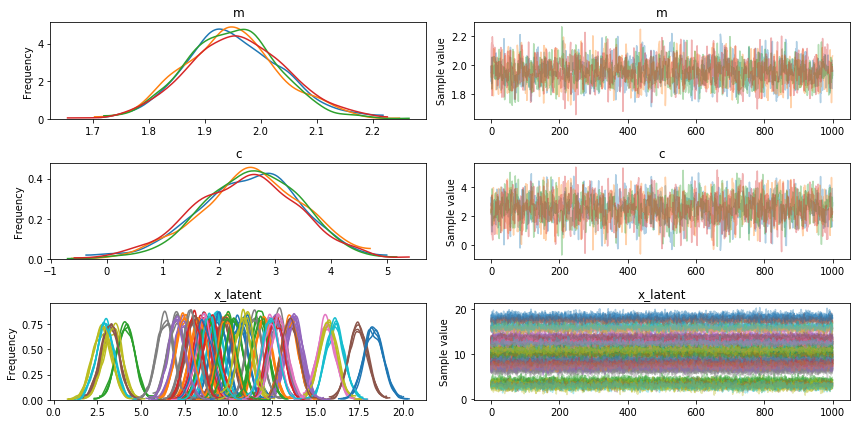

In [5]:
pm.traceplot(trace)

In [6]:
pm.summary(trace).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
m,1.95,0.09,0.00,1.79,2.12,1687.53,1.0
c,2.54,0.92,0.02,0.72,4.33,1594.91,1.0
x_latent__0,10.58,0.49,0.01,9.66,11.53,6271.85,1.0
x_latent__1,13.51,0.49,0.01,12.60,14.51,6195.88,1.0
x_latent__2,4.11,0.53,0.01,3.05,5.09,3625.38,1.0
x_latent__3,8.64,0.48,0.01,7.70,9.59,7551.48,1.0
x_latent__4,12.74,0.48,0.01,11.84,13.75,5717.87,1.0
x_latent__5,17.45,0.54,0.01,16.41,18.51,3671.56,1.0
x_latent__6,8.46,0.49,0.01,7.42,9.31,6212.87,1.0
x_latent__7,12.89,0.47,0.01,12.01,13.86,5773.45,1.0


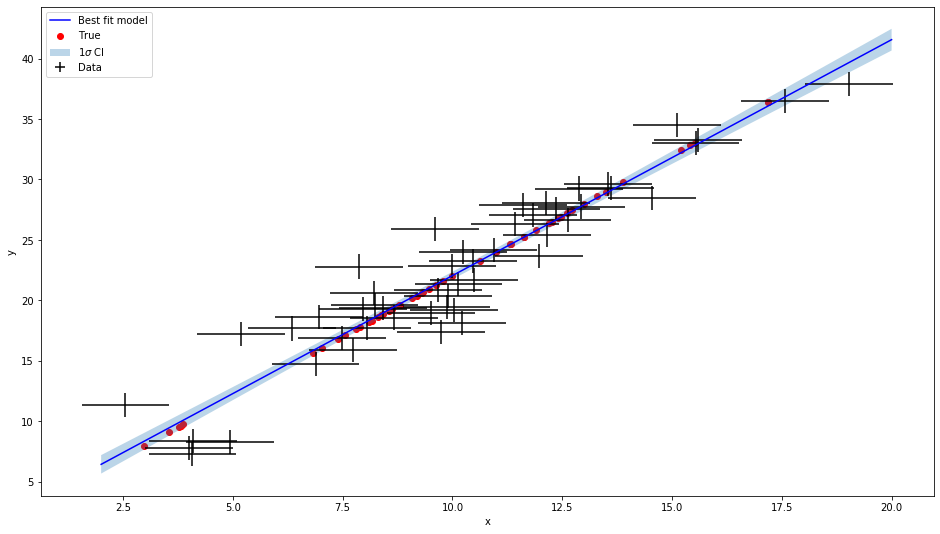

In [7]:
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(x, y, c='r', label='True')
ax.errorbar(x_obs, y_obs, xerr=x_err, yerr=y_err, linestyle='none', c='k', label='Data')

xx = np.linspace(2, 20, 100)
est = [mm*xx+cc for mm, cc in zip(trace['m'], trace['c'])]
std = np.std(est, axis=0)
mean = np.mean(est, axis=0)

ax.plot(xx, mean, c='b', label='Best fit model')
ax.fill_between(xx, mean+std, mean-std, alpha=0.3, label=r'$1 \sigma$ CI')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc=2)

## Model 2

Another really simple model but mother nature is a distribution.  We have $x$ and $y$ and nature knows that $y = 2 x + 2 + \mathcal{N}(0,1)$.

If we are to simulate some data we will say that we have observed some $x_{\rm obs}$ and some $y_{\rm obs}$.  Our observed data has observational noise on it (additive Gaussian noise) so that,

$x_{\rm obs} = x + \mathcal{N}(0, 1)$,

$y_{\rm obs} = y + \mathcal{N}(0, 1)$.

Let's just start by simulating that data:

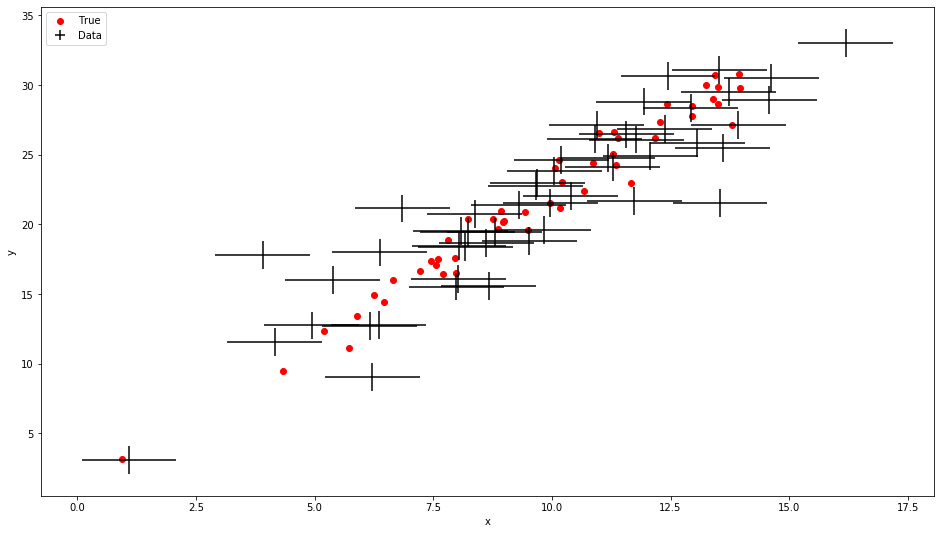

In [8]:
np.random.seed(35) # What is 0x35 in decimal?
npts = 50
m = 2
c = 2
x_err = np.ones(npts)
y_err = np.ones(npts)

x = np.random.randn(npts) * 3 + 10
y = m*x + c + np.random.randn(npts)

x_obs = x + np.random.randn(npts) * x_err
y_obs = y + np.random.randn(npts) * y_err

fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(x, y, c='r', label='True')
ax.errorbar(x_obs, y_obs, xerr=x_err, yerr=y_err, linestyle='none', c='k', label='Data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc=2)

In [9]:
with pm.Model() as model:
    m = pm.Normal('m', 0.0, 10.0, testval=1)
    c = pm.Normal('c', 0.0, 10.0, testval=-1)
    sigma = pm.HalfNormal('sigma', 1.0, testval=1)
    
    x_l = pm.Normal('x_latent', 0.0, 1000.0, shape=len(x_obs), testval=x_obs)
    y_std = pm.Normal('y_std', 0.0, 1.0, shape=len(x_obs), testval=y_obs)
    y_pred = m * x_l + c + (y_std * sigma)
    
    y_observed = pm.Normal('y_obs', y_pred, y_err, observed=y_obs)
    x_observed = pm.Normal('x_obs', x_l, x_err, observed=x_obs)

In [10]:
with model:
    trace = pm.sample(1000, tune=10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_std, x_latent, sigma, c, m]
Sampling 4 chains: 100%|██████████| 44000/44000 [01:10<00:00, 628.05draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bd6a856d8>,
      dtype=object)

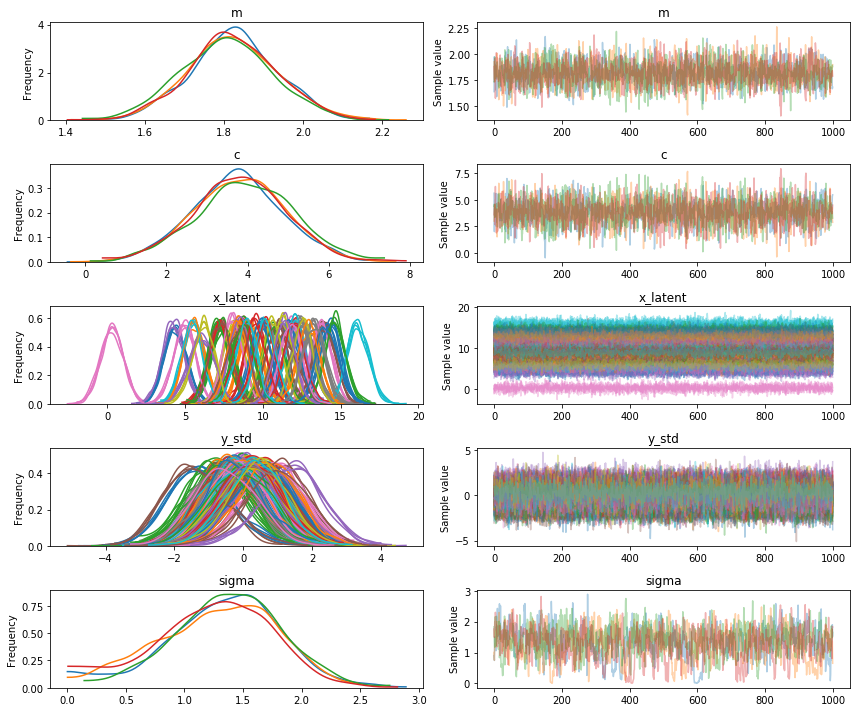

In [11]:
pm.traceplot(trace)

In [12]:
pm.summary(trace).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
m,1.82,0.11,0.00,1.60,2.04,2298.18,1.00
c,3.81,1.16,0.02,1.52,6.08,2300.02,1.00
x_latent__0,4.40,0.74,0.02,3.00,5.91,1778.30,1.00
x_latent__1,9.19,0.70,0.01,7.88,10.64,4622.02,1.00
x_latent__2,7.48,0.72,0.01,6.06,8.88,2992.80,1.00
x_latent__3,7.16,0.71,0.01,5.72,8.49,3223.25,1.00
x_latent__4,4.22,0.69,0.01,2.93,5.65,4907.84,1.00
x_latent__5,13.95,0.70,0.01,12.63,15.34,5901.73,1.00
x_latent__6,13.70,0.70,0.01,12.32,15.06,2743.41,1.00
x_latent__7,12.53,0.69,0.01,11.12,13.87,4428.79,1.00


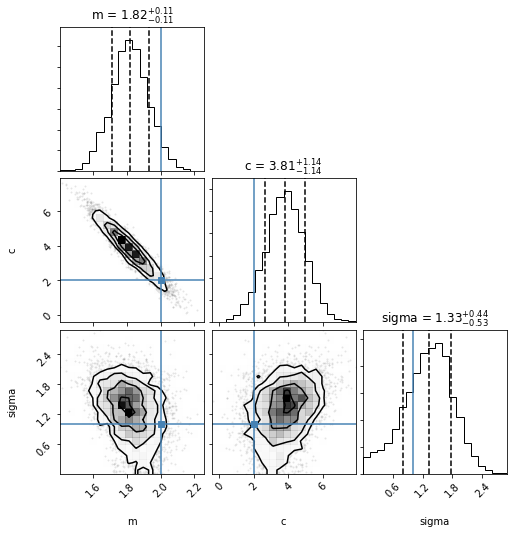

In [19]:
import corner
corner.corner(np.array([trace['m'], trace['c'], trace['sigma']]).T, 
              truths=[2,2,1], 
              labels=['m', 'c', 'sigma'],
              quantiles=[0.16, 0.50, 0.84],
              show_titles=True)
plt.show()

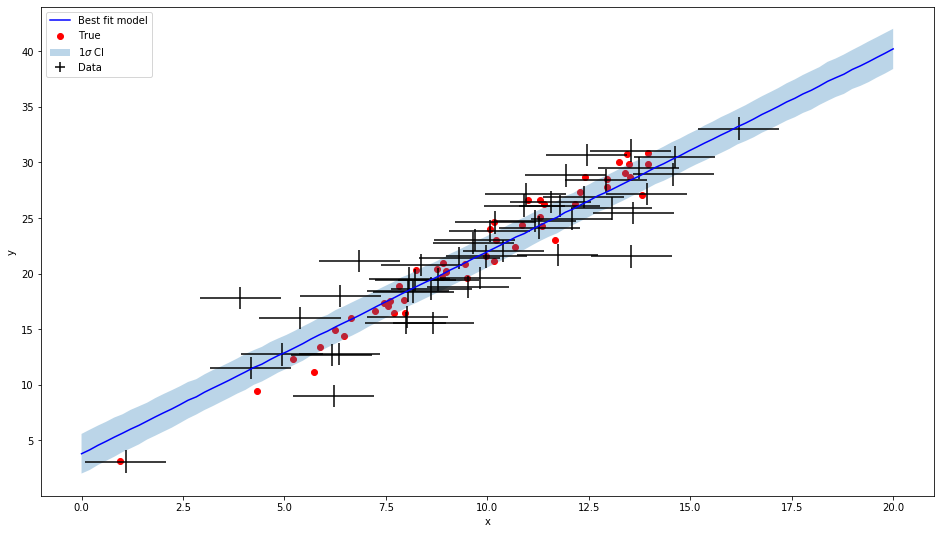

In [14]:
fig, ax = plt.subplots(figsize=[16,9])
ax.scatter(x, y, c='r', label='True')
ax.errorbar(x_obs, y_obs, xerr=x_err, yerr=y_err, linestyle='none', c='k', label='Data')

xx = np.linspace(0, 20, 100)
est = [mm*xx+cc + np.random.randn(len(xx))*sigma for mm, cc, sigma in zip(trace['m'], trace['c'], trace['sigma'])]
std = np.std(est, axis=0)
mean = np.mean(est, axis=0)

ax.plot(xx, mean, c='b', label='Best fit model')
ax.fill_between(xx, mean+std, mean-std, alpha=0.3, label=r'$1 \sigma$ CI')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc=2)